In [139]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import data
from skimage.color import rgb2gray
from PIL import Image
import seaborn as sns

In [124]:
img_count = len(os.listdir('images')) # Gets the amount of images in the directory
#img_count = 5
avg_nicole = np.zeros((150, 150)) # Matrix that will later become the "average" image
nicoles = [] # List that will house all individual arrays of images, will become a matrix later

for nicole in os.listdir('images'):
    # Converts images to correct size and changes its color to grayscale
    img_nicole = img.imread(os.path.join('images',nicole))
    img_nicole = Image.fromarray(np.uint8(img_nicole))
    img_nicole = img_nicole.convert('L')
    img_nicole = img_nicole.resize((150, 150))

    # Turns those images into an array and append them to a list that will become a matrix of images later
    array_nicole = np.array(img_nicole)/255
    avg_nicole += array_nicole
    nicoles.append(array_nicole.flatten())


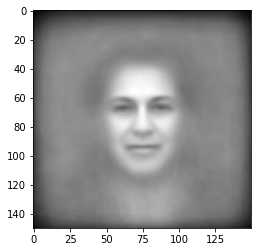

In [125]:
avg_nicole = avg_nicole/img_count # Gets the average image
plt.imshow(avg_nicole, cmap="gray")

In [126]:
def display_image(matrix, index):
    # Displays the image present in the row_{index} of the specified matrix
    resized = np.resize(matrix[index], (150, 150))
    plt.imshow(resized, cmap="gray")




In [127]:
image_matrix = np.row_stack(tuple(nicoles))
subtracted_matrix = image_matrix - avg_nicole.flatten()


In [128]:
u, s, vh = np.linalg.svd(subtracted_matrix, full_matrices=False)

[4.51183965e+02 2.80218216e+02 2.14554223e+02 1.96938725e+02
 1.87309832e+02 1.59177820e+02 1.49994905e+02 1.45762128e+02
 1.37497686e+02 1.32017531e+02 1.24411741e+02 1.18233541e+02
 1.08698765e+02 1.04318832e+02 1.00226937e+02 9.81052505e+01
 9.08038974e+01 8.64232758e+01 8.40340920e+01 8.12972153e+01
 7.59371795e+01 7.42122767e+01 7.27968234e+01 7.07884525e+01
 7.04896156e+01 6.92093352e+01 6.65273793e+01 6.50215243e+01
 6.44330857e+01 6.37245706e+01 6.10334168e+01 6.00095084e+01
 5.96121977e+01 5.91365542e+01 5.81771539e+01 5.60453418e+01
 5.55624297e+01 5.49448813e+01 5.40896597e+01 5.31563279e+01
 5.13820271e+01 5.06437605e+01 4.99906076e+01 4.92091611e+01
 4.89839486e+01 4.83939559e+01 4.80264566e+01 4.74117178e+01
 4.66211885e+01 4.61680685e+01 4.52102174e+01 4.50957057e+01
 4.46210841e+01 4.44209287e+01 4.33852836e+01 4.26245295e+01
 4.22571770e+01 4.18143201e+01 4.15501464e+01 4.07954454e+01
 4.04711650e+01 4.01444040e+01 3.95069836e+01 3.90392895e+01
 3.87996545e+01 3.843128

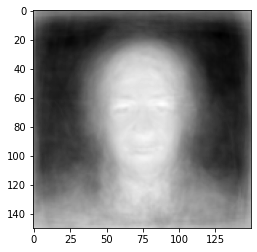

In [141]:
display_image(vh, 0)

In [138]:
def recognize(nicole_num):
    # Treats input image (the one we wish to recognize)
    img_to_recognize = img.imread('images/chaleira'+str(nicole_num)+'.jpg')
    img_to_recognize = Image.fromarray(np.uint8(img_to_recognize))
    img_to_recognize =img_to_recognize.convert('L')
    img_to_recognize = img_to_recognize.resize((150, 150))
    img_to_recognize = np.array(img_to_recognize).flatten()/255

    subtracted_matrix_rec = img_to_recognize - avg_nicole.flatten()


    # Projeção da imagem já subtraída da média no face space para obter o array de coeficientes (pesos de cada eigenface)
    eigenfaces_matrix = vh[:40,:]

    weights_img_to_recognize = []
    for i in range(len(eigenfaces_matrix[:, 0])):
        weight = np.dot(eigenfaces_matrix[i,:], subtracted_matrix_rec)
        weights_img_to_recognize.append(weight)
    weights_img_to_recognize = np.array(weights_img_to_recognize)

    proj_error = np.linalg.norm(subtracted_matrix_rec - np.matmul( weights_img_to_recognize , eigenfaces_matrix))

    return proj_error
    




recognize(1)
    

22.66901147955702

([<matplotlib.axis.XTick at 0x199246960a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

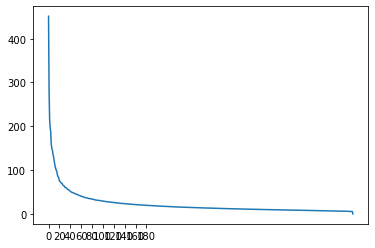

In [146]:
plt.plot(s)
plt.xticks(range(0,200,20))